In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
with open("1208/test_results_Transformer_COMBDAE.pkl", "rb") as f:
    X_test, y_test, y_pred = pickle.load(f)

# 노이즈 강도 데이터 로드
rnd_test = np.load("rnd_test.npy")

print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}, y_pred shape: {y_pred.shape}")


X_test shape: (13316, 512, 1), y_test shape: (13316, 512, 1), y_pred shape: (13316, 512, 1)


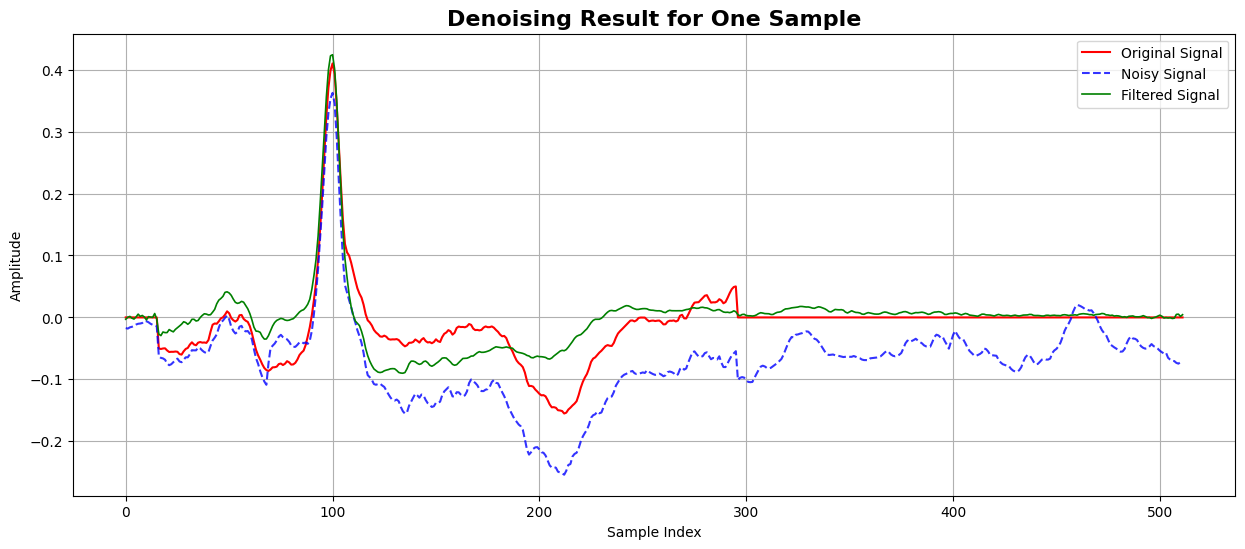

In [2]:
# 시연할 샘플 선택
idx = 0  # 인덱스 0번 샘플 (다른 샘플을 선택 가능)

original_signal = y_test[idx].flatten()
noisy_signal = X_test[idx].flatten()
filtered_signal = y_pred[idx].flatten()

# 시간 축 설정
time = np.arange(len(original_signal))

# 시각화
plt.figure(figsize=(15, 6))
plt.plot(time, original_signal, label="Original Signal", color="red", linewidth=1.5)
plt.plot(time, noisy_signal, label="Noisy Signal", color="blue", linestyle="--", alpha=0.8)
plt.plot(time, filtered_signal, label="Filtered Signal", color="green", linewidth=1.2)
plt.title("Denoising Result for One Sample", fontsize=16, fontweight="bold")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


Noise Range 0.2 to 0.6: Showing 7 samples


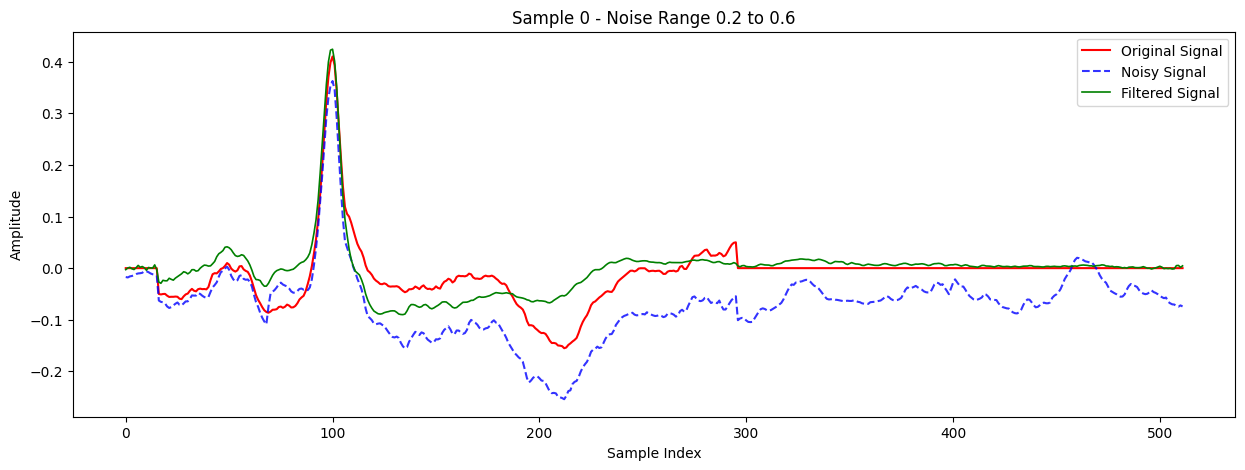

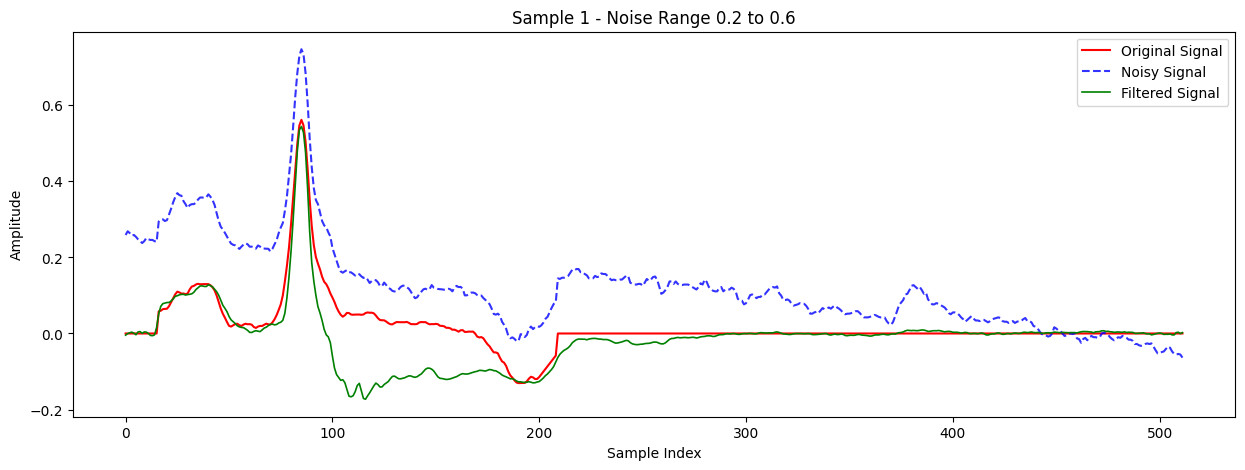

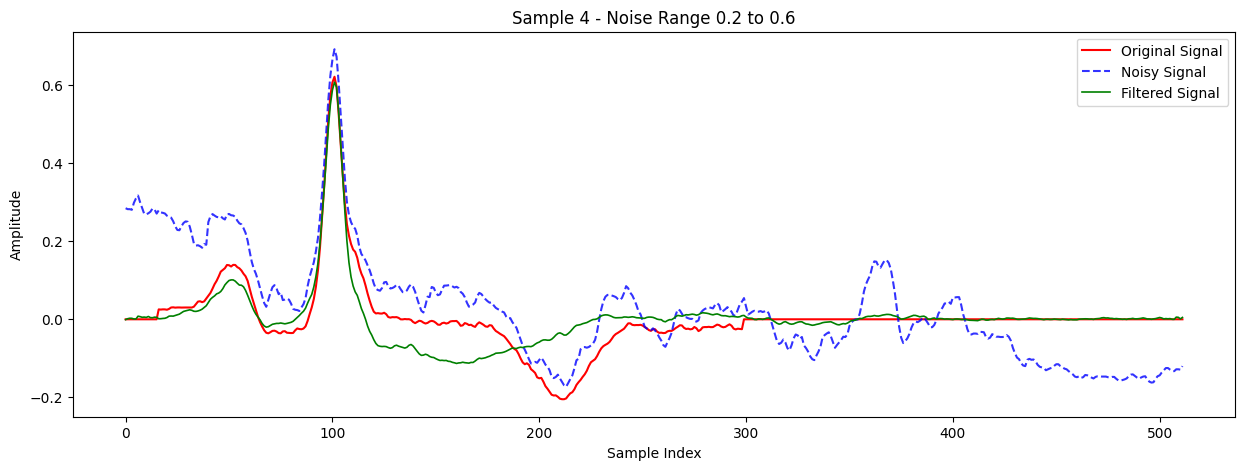

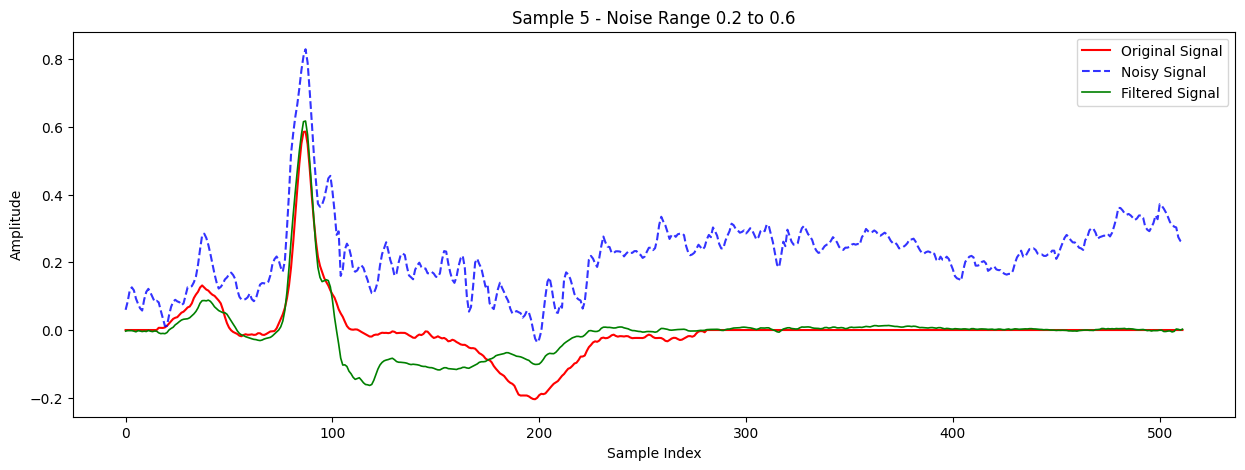

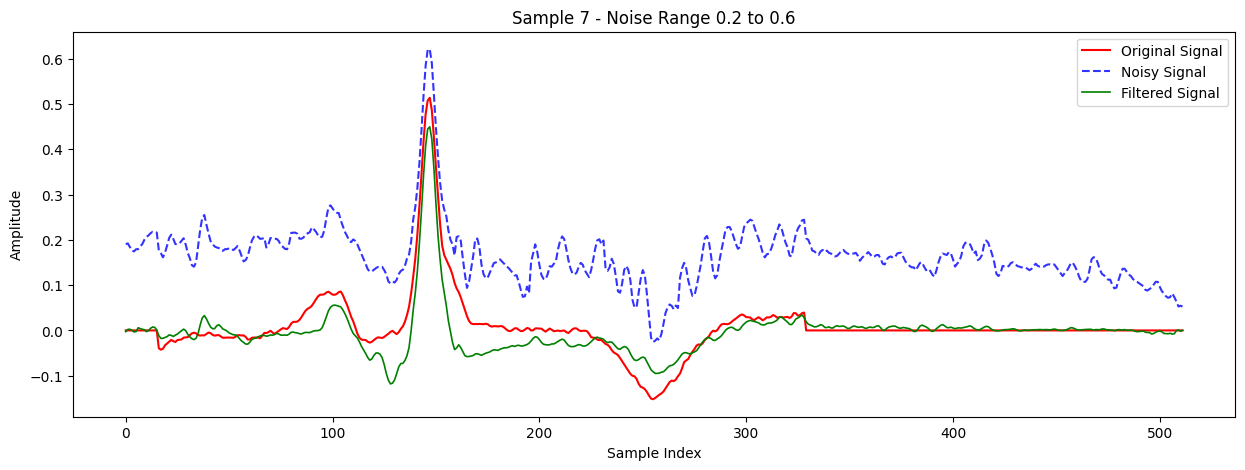

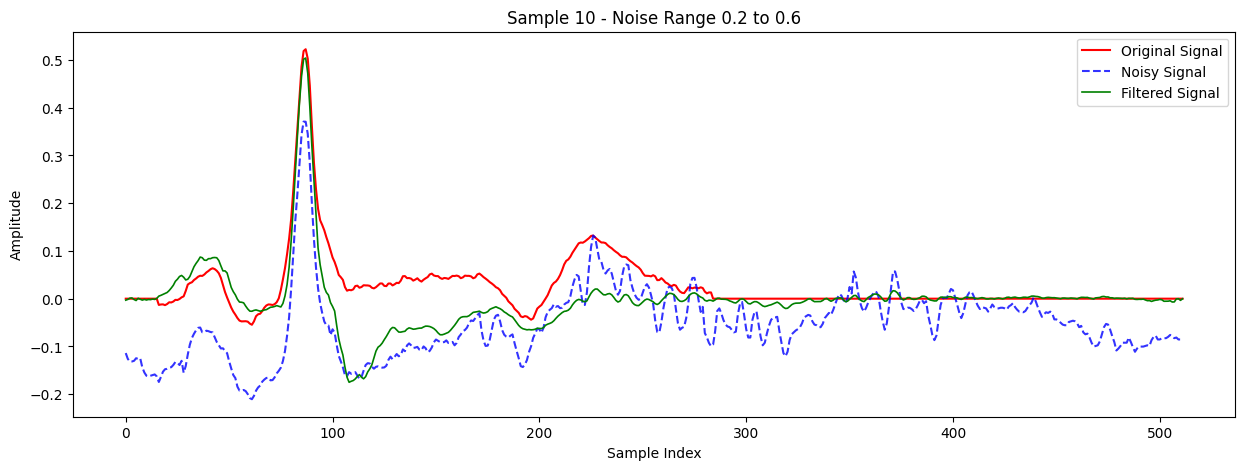

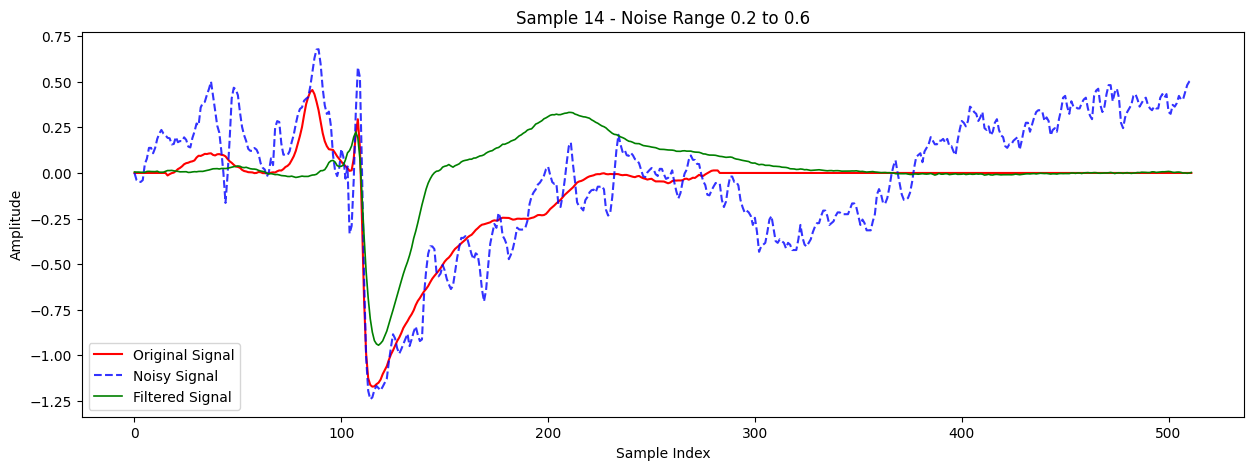

Noise Range 0.6 to 1.0: Showing 7 samples


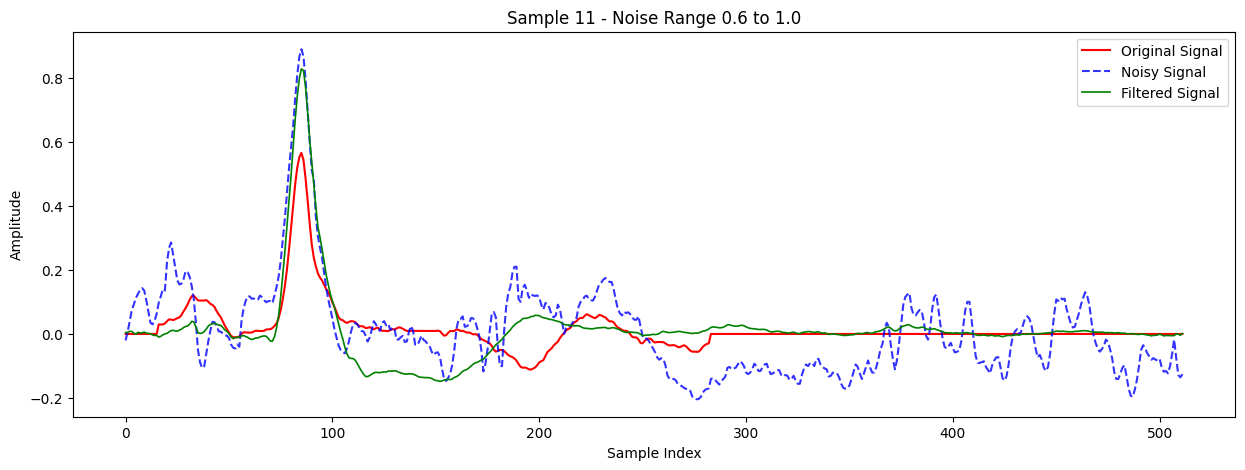

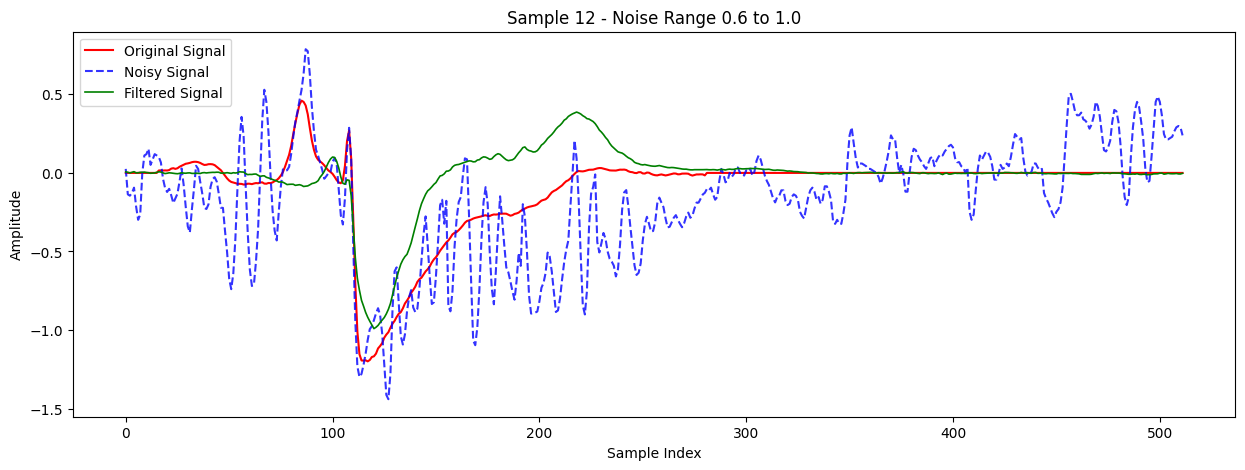

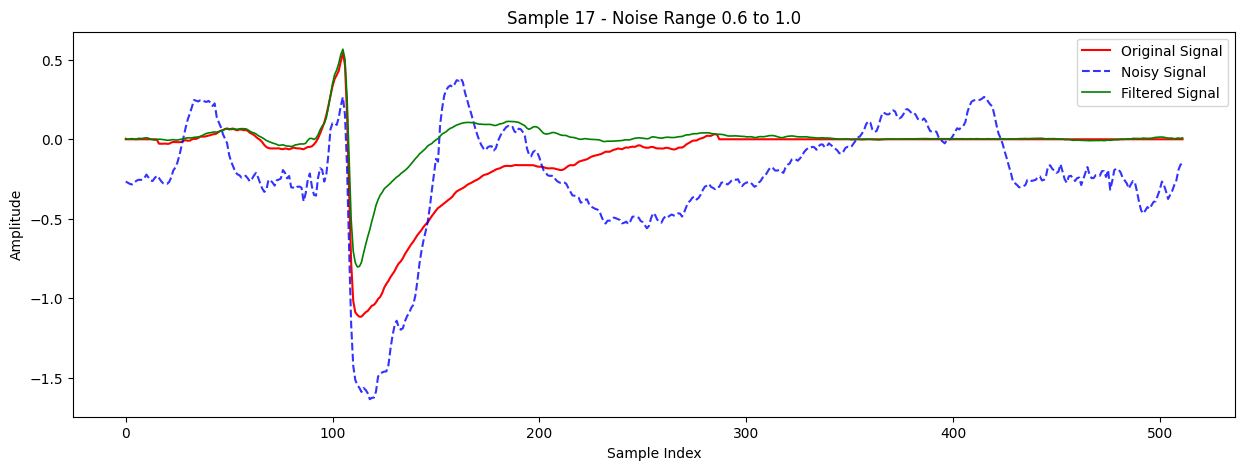

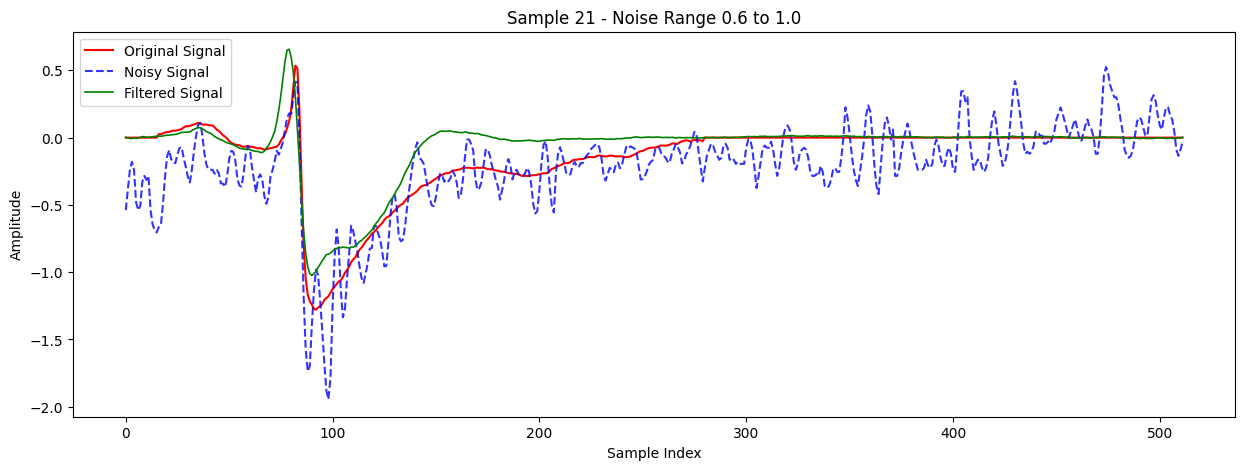

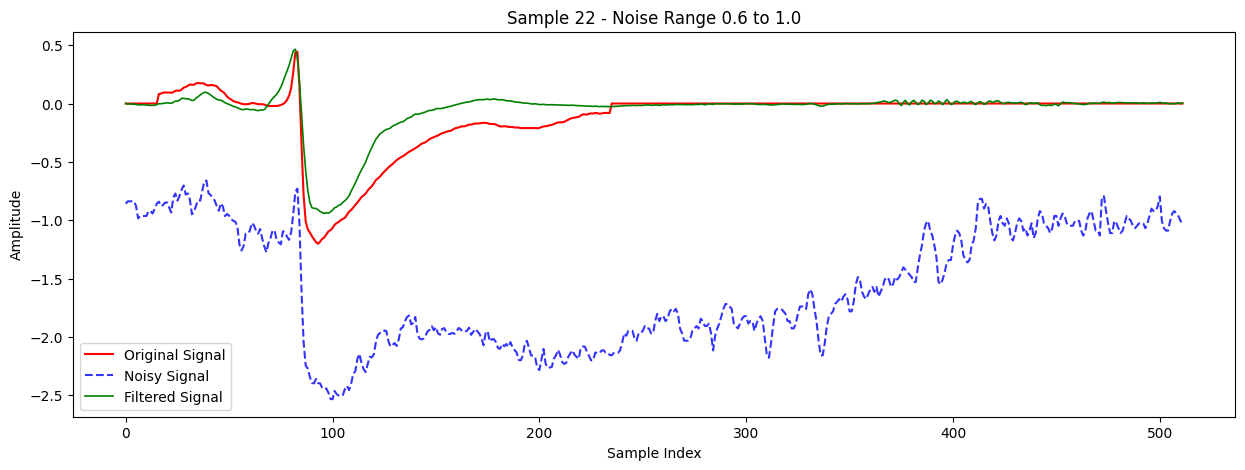

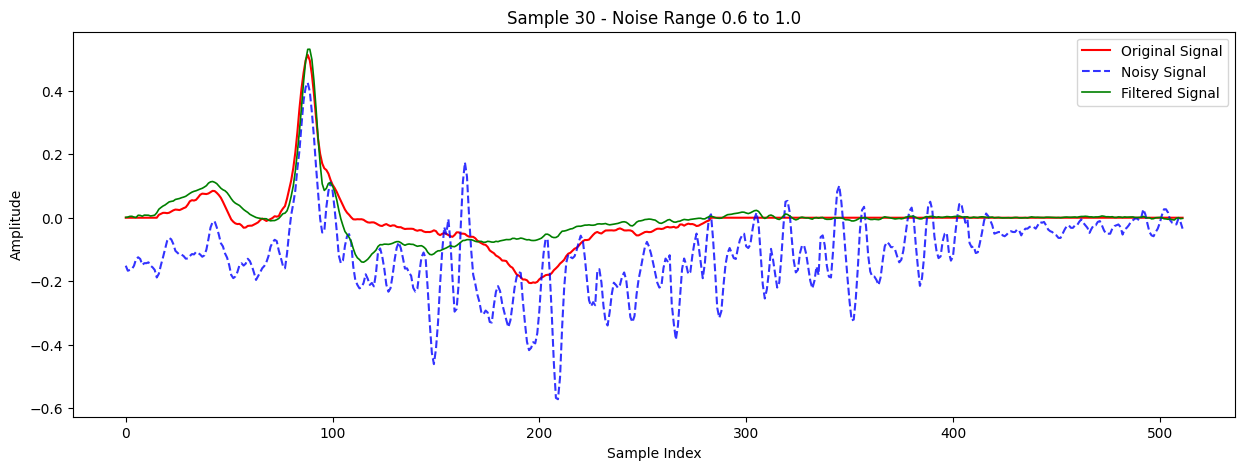

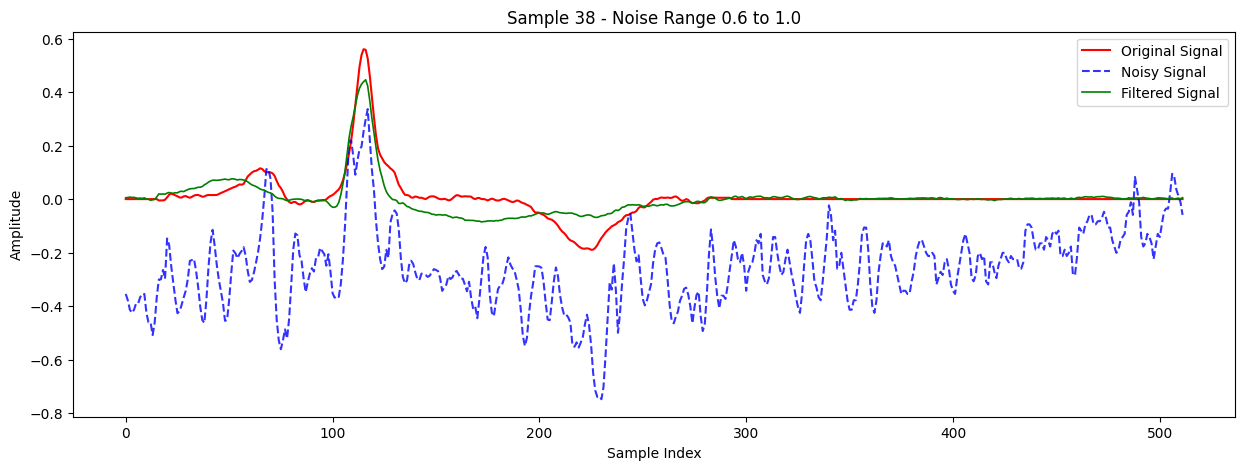

Noise Range 1.0 to 1.5: Showing 7 samples


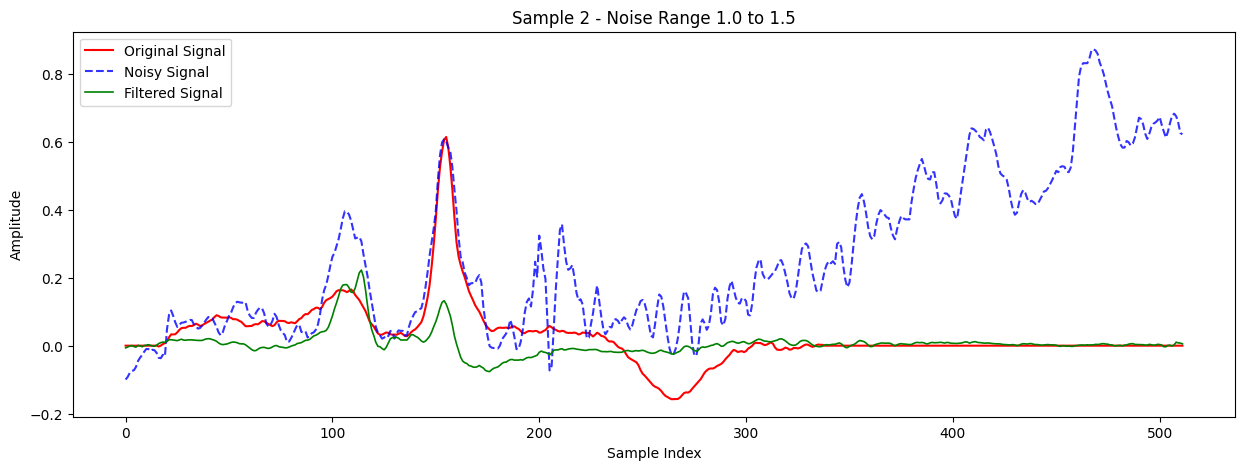

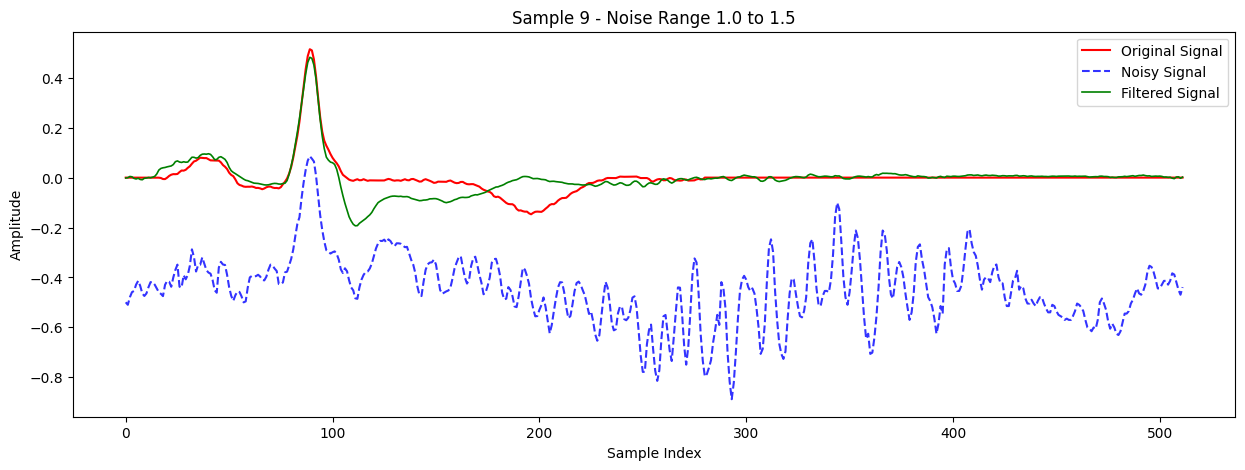

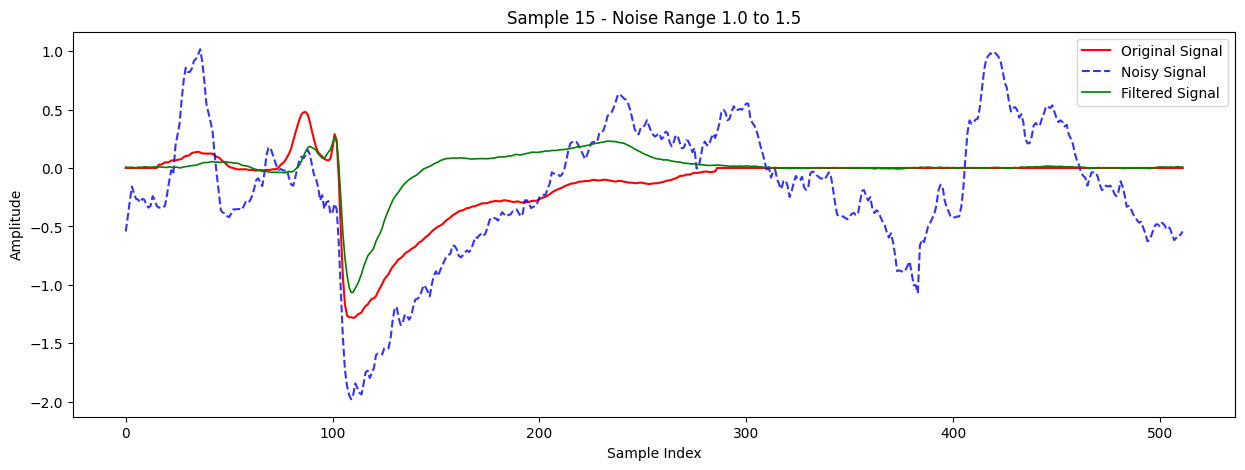

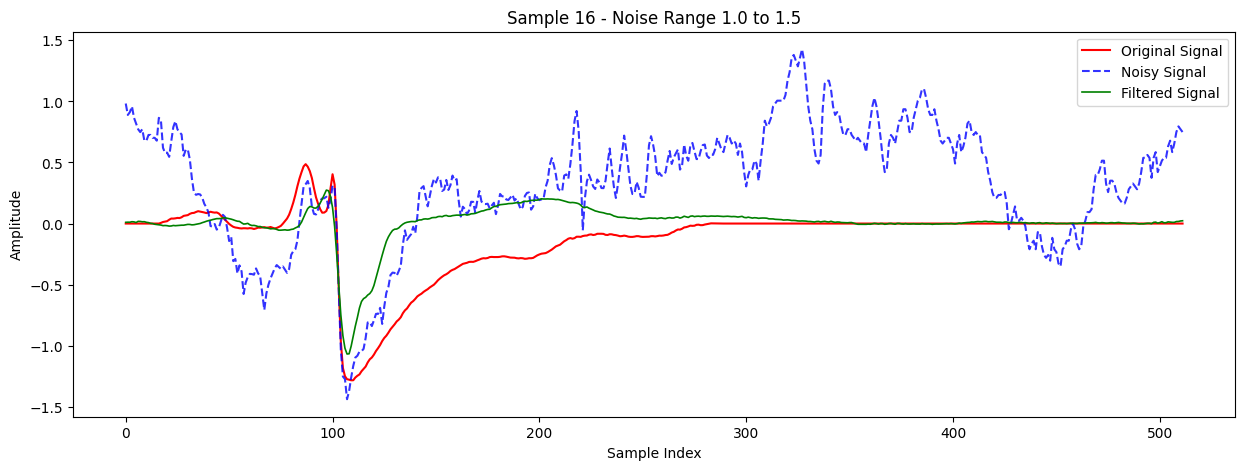

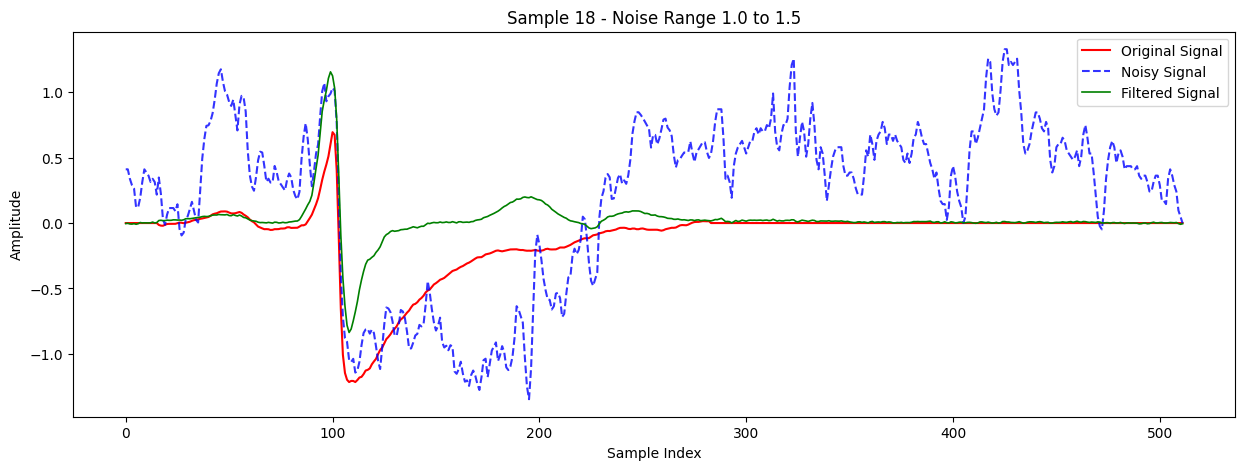

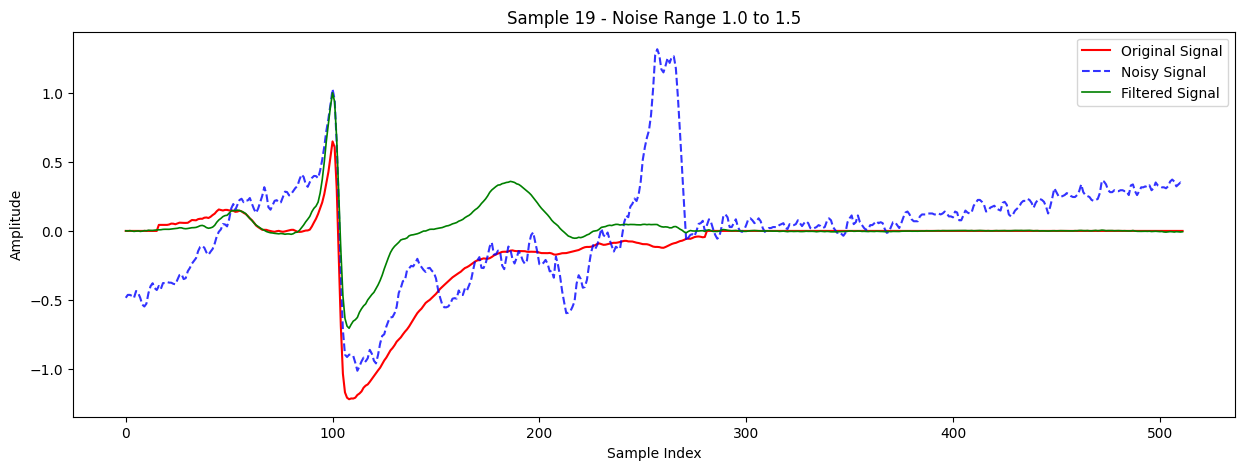

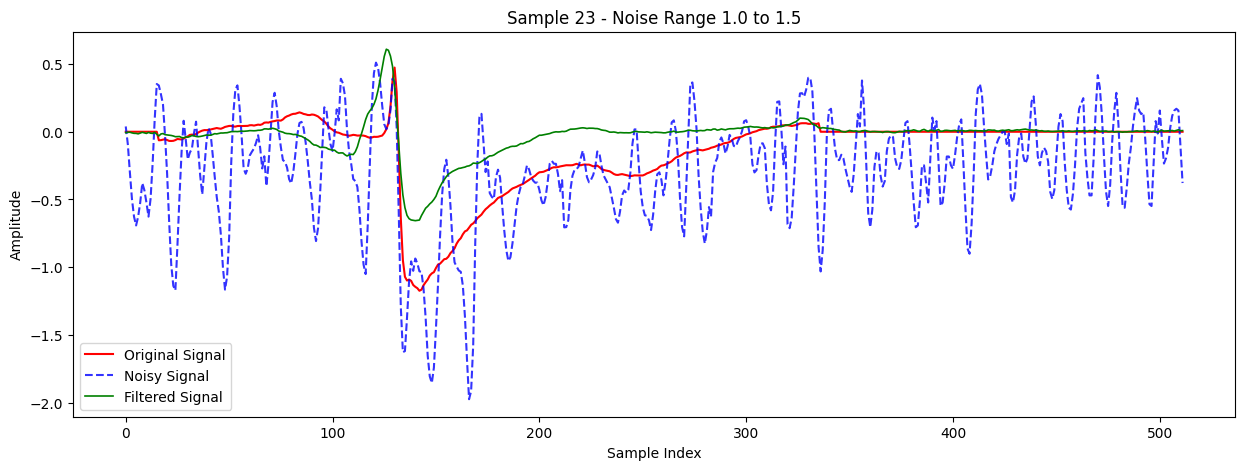

Noise Range 1.5 to 2.0: Showing 7 samples


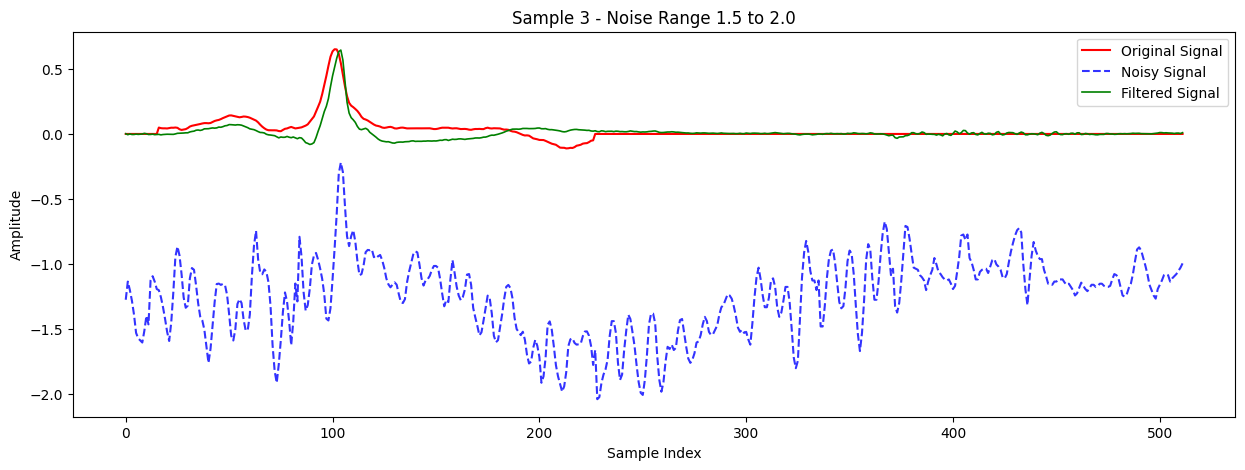

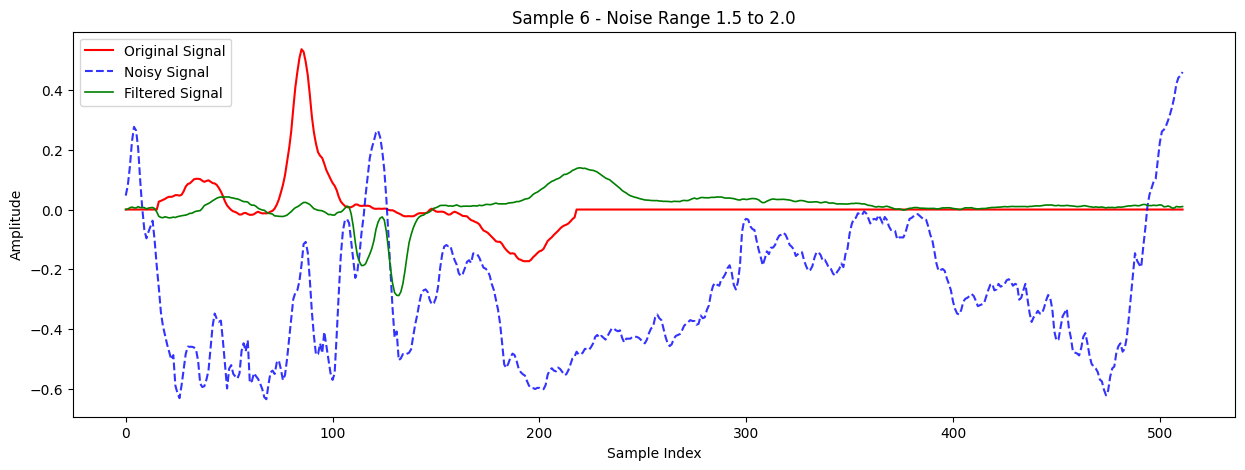

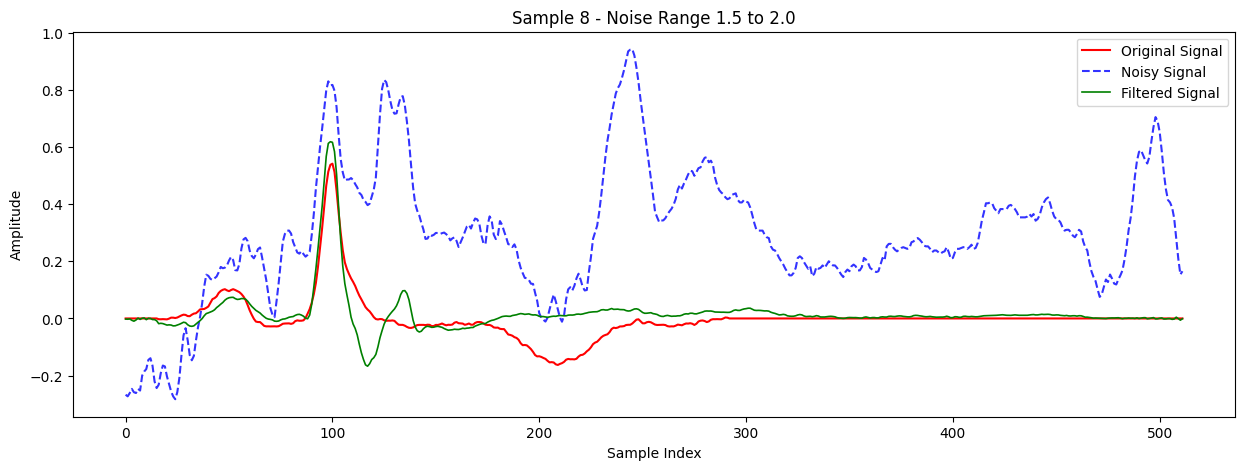

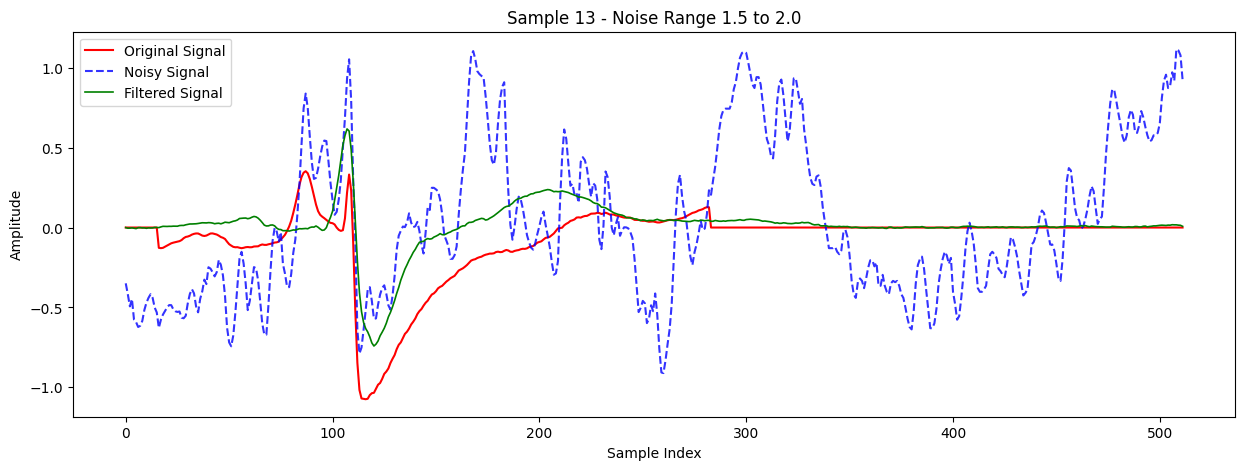

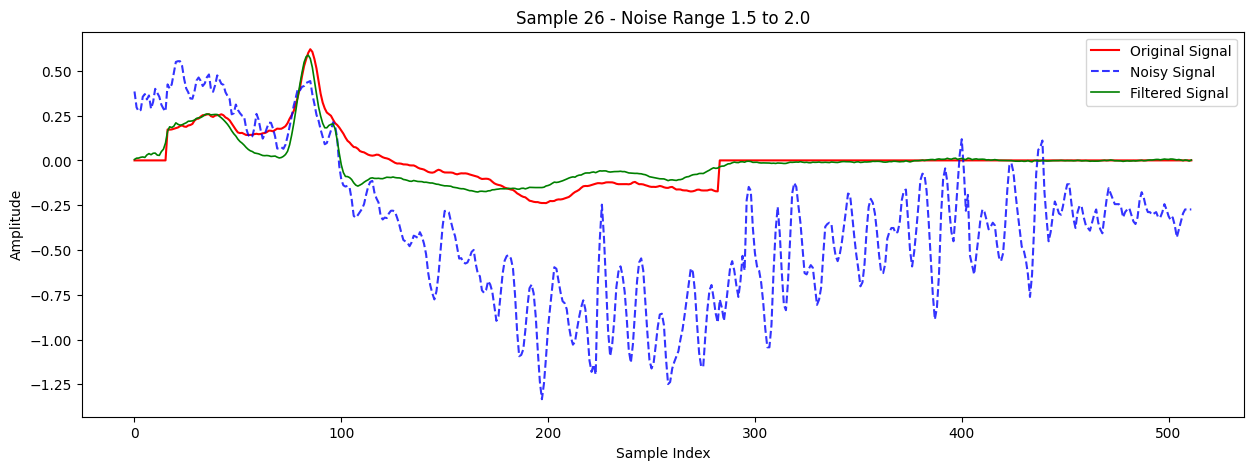

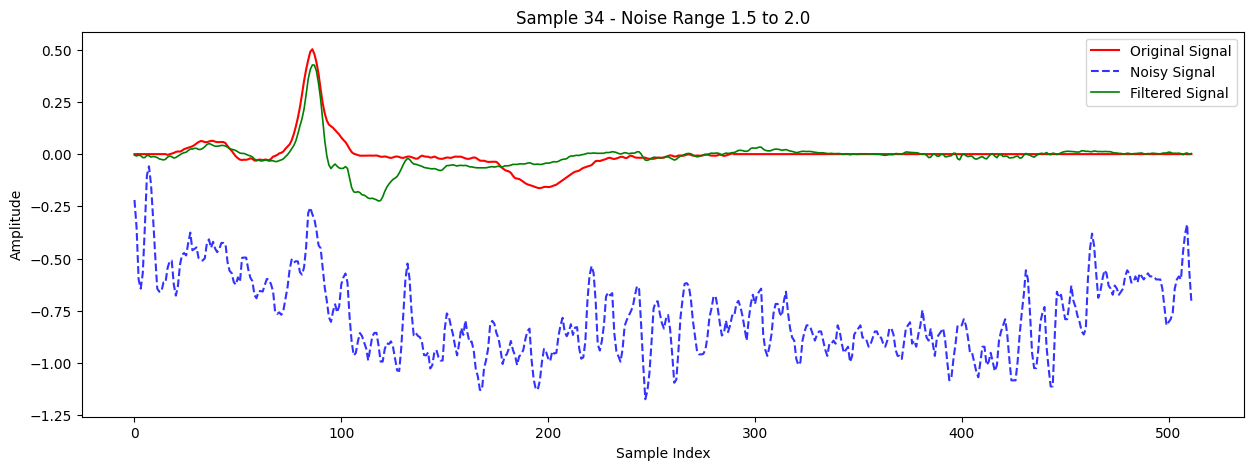

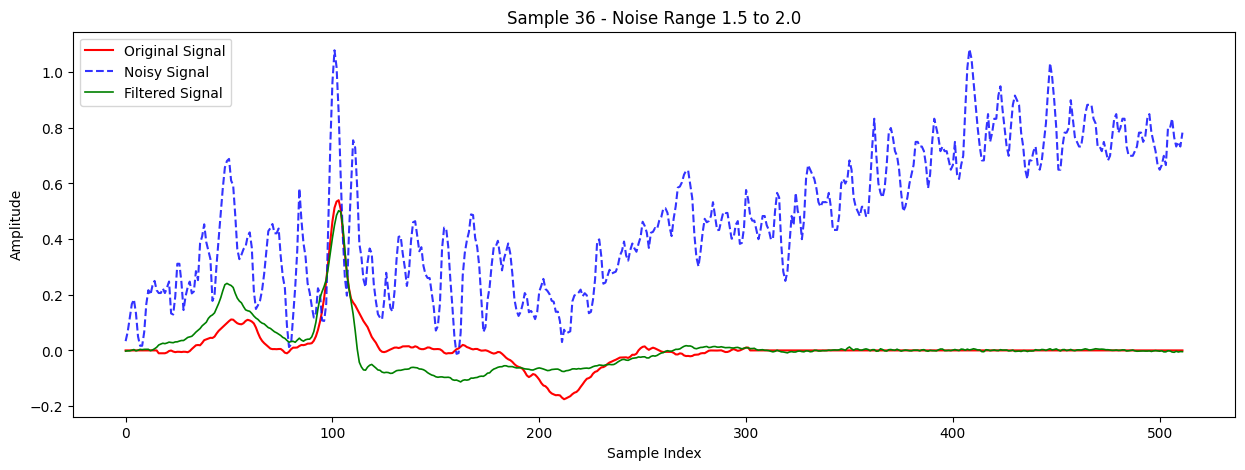

In [3]:
# 노이즈 강도 구간 정의
segm = [0.2, 0.6, 1.0, 1.5, 2.0]  # 노이즈 강도 구간
for i in range(len(segm) - 1):
    noise_start, noise_end = segm[i], segm[i + 1]
    noise_indices = np.where((rnd_test >= noise_start) & (rnd_test < noise_end))[0][:7]  # 각 구간 최대 7개 샘플
    
    print(f"Noise Range {noise_start} to {noise_end}: Showing {len(noise_indices)} samples")
    for idx in noise_indices:
        plt.figure(figsize=(15, 5))
        plt.plot(y_test[idx].flatten(), label="Original Signal", color="red", linewidth=1.5)
        plt.plot(X_test[idx].flatten(), label="Noisy Signal", color="blue", linestyle="--", alpha=0.8)
        plt.plot(y_pred[idx].flatten(), label="Filtered Signal", color="green", linewidth=1.2)
        plt.title(f"Sample {idx} - Noise Range {noise_start} to {noise_end}")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.show()


In [4]:
def calculate_metrics(y_original, y_filtered):
    SSD = np.sum((y_original - y_filtered) ** 2)
    MAD = np.mean(np.abs(y_original - y_filtered))
    PRD = np.sqrt(np.sum((y_original - y_filtered) ** 2) / np.sum(y_original ** 2)) * 100
    COS_SIM = np.dot(y_original, y_filtered) / (np.linalg.norm(y_original) * np.linalg.norm(y_filtered))
    return SSD, MAD, PRD, COS_SIM

# 구간별 평균 메트릭 계산
import pandas as pd

results = []
for i in range(len(segm) - 1):
    noise_start, noise_end = segm[i], segm[i + 1]
    noise_indices = np.where((rnd_test >= noise_start) & (rnd_test < noise_end))[0]
    
    SSD_list, MAD_list, PRD_list, COS_SIM_list = [], [], [], []
    for idx in noise_indices:
        SSD, MAD, PRD, COS_SIM = calculate_metrics(y_test[idx].flatten(), y_pred[idx].flatten())
        SSD_list.append(SSD)
        MAD_list.append(MAD)
        PRD_list.append(PRD)
        COS_SIM_list.append(COS_SIM)
    
    results.append({
        "Noise Range": f"{noise_start} - {noise_end}",
        "Mean SSD": np.mean(SSD_list),
        "Mean MAD": np.mean(MAD_list),
        "Mean PRD": np.mean(PRD_list),
        "Mean COS_SIM": np.mean(COS_SIM_list),
    })

# 결과를 DataFrame으로 출력
df = pd.DataFrame(results)
print(df)


  Noise Range  Mean SSD  Mean MAD   Mean PRD  Mean COS_SIM
0   0.2 - 0.6  3.589734  0.040927  32.809133      0.940723
1   0.6 - 1.0  4.285011  0.044598  37.623233      0.921429
2   1.0 - 1.5  5.152544  0.048643  41.145368      0.902773
3   1.5 - 2.0  6.744986  0.055062  46.867595      0.873507


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from ipywidgets import interact, widgets, IntSlider, Dropdown, VBox, HBox, Output
from matplotlib.animation import FuncAnimation
import os

# Ensure directory exists
def ensure_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)


In [ ]:
# 데이터 로드
with open("1208/test_results_Transformer_COMBDAE.pkl", "rb") as f:
    X_test, y_test, y_pred = pickle.load(f)

# 인터랙티브 출력
output = Output()

def interactive_plot(sample_idx):
    with output:
        output.clear_output()
        original_signal = y_test[sample_idx].flatten()
        noisy_signal = X_test[sample_idx].flatten()
        filtered_signal = y_pred[sample_idx].flatten()

        plt.figure(figsize=(12, 6))
        plt.plot(original_signal, label="Original", color="red", linewidth=1.5)
        plt.plot(noisy_signal, label="Noisy", color="blue", linestyle="--", alpha=0.8)
        plt.plot(filtered_signal, label="Filtered", color="green", linewidth=1.2)
        plt.title(f"Sample {sample_idx} - Denoising Result")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid(True)
        plt.show()

# 슬라이더 설정
sample_slider = IntSlider(value=0, min=0, max=len(X_test)-1, step=1, description="Sample Index")
interactive_plot = interact(interactive_plot, sample_idx=sample_slider)
